## These are the model building codes in the EY 2023 Open Science Data Challenge

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Weather data
weather = np.load('crop_weather_staged.npy')
# Vegetation indices divided by 4 stages
vi_n4 = np.load('crop_vi_filtered.npy')
# Vegetation indices divided by 8 stages
vi_n8 = np.load('crop_vi_staged.npy')
# Frequencies in each stage
freq = np.load('crop_vi_freq.npy')
# Autocorrelation Function
acf = np.load('acf_crop_zeros.npy')
# Permutation entropy
pe = np.load('pe_crop.npy')

In [3]:
print(weather.shape)
#（index, stage, values*var）
print(vi_n4.shape)
#（index, var, stage, values）
print(vi_n8.shape)
#（index, var, stage, values）
print(freq.shape)

(557, 4, 45)
(557, 4, 4, 5)
(557, 8, 4, 5)
(557, 4)


In [4]:
print(acf.shape)
# (index, vars, stage)
print(pe.shape)
# (index, vars)

(557, 8, 4)
(557, 8)


In [5]:
weather_2D = np.reshape(weather,(557,weather.shape[1]*weather.shape[2]))
weather_2D.shape

(557, 180)

In [6]:
vi_n4_2D = np.reshape(vi_n4,(557,vi_n4.shape[1]*vi_n4.shape[2]*vi_n4.shape[3]))
vi_n4_2D.shape

(557, 80)

In [7]:
vi_n8_2D = np.reshape(vi_n8,(557,vi_n8.shape[1]*vi_n8.shape[2]*vi_n8.shape[3]))
vi_n8_2D.shape

(557, 160)

In [8]:
acf_4vi = np.delete(acf,np.arange(4,8),axis=1)
acf_4vi_2D = np.reshape(acf_4vi,(557,acf_4vi.shape[1]*acf_4vi.shape[2]))
acf_4vi_2D.shape

(557, 16)

In [9]:
pe_4vi = np.delete(pe,np.arange(4,8),axis=1)
pe_4vi.shape

(557, 4)

In [10]:
index_train = pd.read_csv('Crop_Yield_Data_challenge_2.csv')
index_train

,District,Latitude,Longitude,"Season(SA = Summer Autumn, WS = Winter Spring)","Rice Crop Intensity(D=Double, T=Triple)",Date of Harvest,Field size (ha),Rice Yield (kg/ha)
0,Chau_Phu,10.510542,105.248554,SA,T,15-07-2022,3.40,5500
1,Chau_Phu,10.509150,105.265098,SA,T,15-07-2022,2.43,6000
2,Chau_Phu,10.467721,105.192464,SA,D,15-07-2022,1.95,6400
3,Chau_Phu,10.494453,105.241281,SA,T,15-07-2022,4.30,6000
4,Chau_Phu,10.535058,105.252744,SA,D,14-07-2022,3.30,6400
...,...,...,...,...,...,...,...,...
552,Thoai_Son,10.364419,105.164984,WS,T,12-04-2022,7.80,6640
553,Thoai_Son,10.358094,105.189541,WS,T,12-04-2022,2.00,7200
554,Thoai_Son,10.368014,105.238516,WS,T,12-04-2022,6.20,7200
555,Thoai_Son,10.275419,105.234563,WS,T,20-04-2022,3.00,6400


In [11]:
n_cycle = pd.get_dummies(index_train['Rice Crop Intensity(D=Double, T=Triple)'])
n_cycle = np.reshape(np.array(n_cycle['D']),(-1,1))
field_size = np.reshape(np.array(index_train['Field size (ha)']),(-1,1))

In [12]:
y_train = index_train['Rice Yield (kg/ha)']
y_train.shape

(557,)

In [20]:
X_train_4vi = np.concatenate((weather_2D, vi_n4_2D, freq, n_cycle, field_size),axis=1)
X_train_4vi.shape

(557, 266)

In [22]:
X_train_4vi_acf_pe = np.concatenate((weather_2D, vi_n4_2D, freq, acf_4vi_2D, pe_4vi, n_cycle, field_size),axis=1)
X_train_4vi_acf_pe.shape

(557, 286)

In [12]:
X_train_8vi = np.concatenate((weather_2D,vi_n8_2D,freq,n_cycle,field_size),axis=1)
X_train_8vi.shape

(557, 346)

### Try to delete the possible irrelevant variables but fail to improve model's performance.

In [17]:
X_train_nofreq = np.concatenate((weather_2D,vi_2D,n_cycle,field_size),axis=1)
X_train_nofreq.shape

(557, 262)

In [48]:
huss_index = np.arange(1,45,9)
rlds_index = np.arange(3,45,9)
index_huss_rlds = np.concatenate((huss_index, rlds_index))
index_huss_rlds

array([ 1, 10, 19, 28, 37,  3, 12, 21, 30, 39])

In [47]:
weather_no_huss_rlds = np.delete(weather,index_huss_rlds,axis=2)
weather_no_huss_rlds.shape

(557, 4, 35)

In [50]:
weather_no_huss_rlds_2D = np.reshape(weather_no_huss_rlds,(557,weather_no_huss_rlds.shape[1]*weather_no_huss_rlds.shape[2]))
weather_no_huss_rlds_2D.shape

(557, 140)

In [51]:
X_train_no_huss_rlds = np.concatenate((weather_no_huss_rlds_2D, vi_2D, freq, n_cycle, field_size),axis=1)
X_train_no_huss_rlds.shape

(557, 226)

# Train the model

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [ ]:
import lightgbm as lgb

## Decision Tree (LightGBM)

In [54]:
data_train = lgb.Dataset(X_train,label=y_train)

In [88]:
params = {'boosting_type': 'gbdt',
         'objective': 'regression',
         'random_state': 28,
         }

In [72]:
# Default
cv_results = lgb.cv(params, data_train, nfold=3,
                    stratified=False, metrics='rmse',
                   )

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002478 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22700
[LightGBM] [Info] Number of data points in the train set: 370, number of used features: 262
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002228 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22700
[LightGBM] [Info] Number of data points in the train set: 370, number of used features: 262
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002153 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22700
[LightGBM] [Info] Number of data points in the train set: 370, number of used features: 262
[LightGBM] [Info] Start training from score 6623.621622
[LightGBM] [Warning] No further splits with positive gain, best gain

In [73]:
print('best n_estimators:', len(cv_results['rmse-mean']))
print('best cv score:', cv_results['rmse-mean'][-1])

best n_estimators: 100
best cv score: 494.11334304592725


Tune `num_leaves` and `max_depth`

In [101]:
param1 = {'num_leaves':range(2,51,10),
          'max_depth':range(1,6)}

In [102]:
model_lgb1 = lgb.LGBMRegressor(**params, n_estimators=100, n_jobs=-1)
search1 = GridSearchCV(model_lgb1, param1, scoring='r2',
                       n_jobs=-1, cv=3)
search1.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=LGBMRegressor(objective='regression', random_state=28),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 6),
                         'num_leaves': range(2, 51, 10)},
             scoring='r2')

In [103]:
print('best_params:',search1.best_params_)
print('best_score:', search1.best_score_)

best_params: {'max_depth': 1, 'num_leaves': 2}
best_score: 0.6208098304149215


In [80]:
param1_1 = {'num_leaves':range(2,21),
          'max_depth':range(1,6)}

In [104]:
model_lgb1_1 = lgb.LGBMRegressor(**params, n_estimators=100, n_jobs=-1)
search1 = GridSearchCV(model_lgb1_1, param1_1, scoring='r2',
                       n_jobs=-1, cv=3)
search1.fit(X_train, y_train)
print('best_params:',search1.best_params_)
print('best_score:', search1.best_score_)

best_params: {'max_depth': 4, 'num_leaves': 6}
best_score: 0.6236815611756809


Tune `min_child_weight` and `min_child_samples`

In [84]:
param2 = {'min_child_weight':[0.001,0.002,0.003,0.004,0.005],
          'min_child_samples':range(15,25)}

In [162]:
model_lgb2 = lgb.LGBMRegressor(**params, n_estimators=100, 
                               max_depth=4, num_leaves=6,
                               n_jobs=-1)
search2 = GridSearchCV(model_lgb2, param2, scoring='r2',
                       n_jobs=-1, cv=3)
search2.fit(X_train, y_train)
print('best_params:',search2.best_params_)
print('best_score:', search2.best_score_)

best_params: {'min_child_samples': 20, 'min_child_weight': 0.001}
best_score: 0.6236815611756809


Tune `feature_fraction` and `bagging_fraction`

In [93]:
param3 = {'feature_fraction': np.arange(0.1,1,0.1),
          'bagging_fraction': np.arange(0.1,1,0.1)}

In [94]:
model_lgb3 = lgb.LGBMRegressor(**params, n_estimators=100, 
                               max_depth=4, num_leaves=6,
                               min_child_samples=20, min_child_weight=0.001,
                               n_jobs=-1)
search3 = GridSearchCV(model_lgb3, param3, scoring='r2',
                       n_jobs=-1, cv=3)
search3.fit(X_train, y_train)

[LightGBM] [Warning] bagging_fraction is set=1.2999999999999998, subsample=1.0 will be ignored. Current value: bagging_fraction=1.2999999999999998
[LightGBM] [Warning] feature_fraction is set=0.7999999999999999, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7999999999999999
[LightGBM] [Warning] bagging_fraction is set=1.2999999999999998, subsample=1.0 will be ignored. Current value: bagging_fraction=1.2999999999999998
[LightGBM] [Warning] feature_fraction is set=0.8999999999999999, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8999999999999999
[LightGBM] [Warning] bagging_fraction is set=1.2999999999999998, subsample=1.0 will be ignored. Current value: bagging_fraction=1.2999999999999998
[LightGBM] [Warning] feature_fraction is set=0.8999999999999999, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8999999999999999
[LightGBM] [Warning] bagging_fraction is set=1.2999999999999998, subsample=1.0 will be ignored. C

GridSearchCV(cv=3,
             estimator=LGBMRegressor(max_depth=4, num_leaves=6,
                                     objective='regression', random_state=28),
             n_jobs=-1,
             param_grid={'bagging_fraction': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'feature_fraction': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             scoring='r2')

In [96]:
print('best_params:',search3.best_params_)
print('best_score:', search3.best_score_)

best_params: {'bagging_fraction': 0.1, 'feature_fraction': 0.4}
best_score: 0.6233993422200201


Tune `learning rate`

In [139]:
params_best = {'learning_rate': 0.03,
               'boosting_type': 'gbdt',
               'objective': 'regression',
               'random_state': 28,
               'max_depth': 4,
               'num_leaves':6,
               'min_child_samples': 20,
               'min_child_weight': 0.001,
               'bagging_fraction': 0.1,
               'feature_fraction': 0.4
               }

In [140]:
cv_results = lgb.cv(params_best, data_train, nfold=3,
                    stratified=False, metrics='rmse',
                   )

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22700
[LightGBM] [Info] Number of data points in the train set: 370, number of used features: 262
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001989 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22700
[LightGBM] [Info] Number of data points in the train set: 370, number of used features: 262
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001741 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22700
[LightGBM] [Info] Number of data points in the train set: 370, number of used features: 262
[LightGBM] [Info] Start training from score 6623.621622
[LightGBM] [Info] Start training from score 6639.891892
[LightGBM] [

In [141]:
print('best n_estimators:', len(cv_results['rmse-mean']))
print('best cv score:', cv_results['rmse-mean'][-1])

best n_estimators: 100
best cv score: 465.3901342491037


In [142]:
model_lgb_best = lgb.LGBMRegressor(**params_best,n_estimators=100,n_jobs=-1)

## Random Forest

In [15]:
rf0 = RandomForestRegressor(n_jobs=-1, random_state=28)

In [34]:
cv_score0 = cross_val_score(rf0,
                            X_train_4vi, y_train,
                            scoring='r2',
                            cv=3,
                            n_jobs=-1).mean()
cv_score0

0.638929873449547

In [14]:
rf0_8vi = RandomForestRegressor(n_jobs=-1, random_state=28)
cv_score0_8vi = cross_val_score(rf0_8vi,
                                X_train_8vi, y_train,
                                scoring='r2',
                                cv=3,
                                n_jobs=-1).mean()
cv_score0_8vi

0.6437044599748681

In [23]:
cv0_4vi_acf_pe = cross_val_score(rf0,
                                 X_train_4vi_acf_pe, y_train,
                                 scoring='r2',
                                 cv=3, n_jobs=-1).mean()
cv0_4vi_acf_pe

0.638551016464456

### Delete the features whose importance are 0

In [17]:
rf0.fit(X_train_4vi, y_train)

RandomForestRegressor(n_jobs=-1, random_state=28)

In [18]:
importances = rf0.feature_importances_
## Convert the indices of features with importance of 0 into a list
indices = sum(np.argwhere(importances==0).tolist(),[])
print(len(indices))

7


In [28]:
X_train_n8_filtered = np.delete(X_train_n8, indices, axis=1)
X_train_n8_filtered.shape

(557, 343)

In [29]:
rf0_8vi_filtered = RandomForestRegressor(n_jobs=-1, random_state=28)
cv_score0_8vi_filtered = cross_val_score(rf0_8vi_filtered,
                                         X_train_n8_filtered, y_train,
                                         scoring='r2',
                                         cv=3,
                                         n_jobs=-1).mean()
cv_score0_8vi_filtered

0.6379239668359673

### Try ExtraTreesRegressor

In [30]:
from sklearn.ensemble import ExtraTreesRegressor

In [31]:
et0 = ExtraTreesRegressor(n_jobs=-1, random_state=28)
cv_score_et0 = cross_val_score(et0,
                               X_train_n8, y_train,
                               scoring='r2',
                               cv=3,
                               n_jobs=-1).mean()
cv_score_et0

0.6226819464185686

### Tune the hyperparameters

#### 4 VIs

In [35]:
cv_score_list = []
for i in range(50,250,10):
    rf = RandomForestRegressor(n_estimators=i,
                               n_jobs=-1, random_state=28)
    cv_score = cross_val_score(rf, X_train_4vi, y_train,
                               scoring='r2',
                               cv=3,
                               n_jobs=-1).mean()
    cv_score_list.append(cv_score)
print(max(cv_score_list),([*range(50,250,10)][cv_score_list.index(max(cv_score_list))]))

0.641703673630726 200


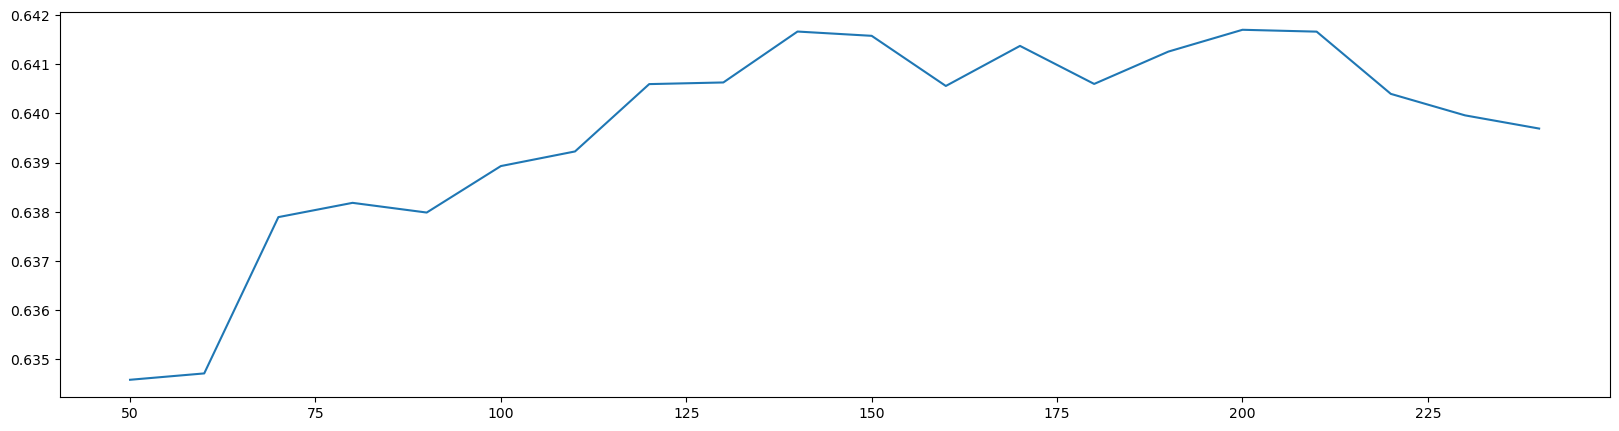

In [36]:
plt.figure(figsize=[20,5])
plt.plot(range(50,250,10),cv_score_list)
plt.show()

In [37]:
cv_score_list = []
for i in range(191,210):
    rf = RandomForestRegressor(n_estimators=i,
                               n_jobs=-1, random_state=28)
    cv_score = cross_val_score(rf, X_train_4vi, y_train,
                               scoring='r2',
                               cv=3,
                               n_jobs=-1).mean()
    cv_score_list.append(cv_score)
print(max(cv_score_list),([*range(191,210)][cv_score_list.index(max(cv_score_list))]))

0.6419265010143422 205


In [38]:
# max_depth
cv_score_list=[]
for i in range(1,11):
    rf = RandomForestRegressor(n_estimators=205,
                               max_depth=i,
                               n_jobs=-1, random_state=28)
    cv_score = cross_val_score(rf, X_train_4vi, y_train,
                               scoring='r2',
                               cv=3,
                               n_jobs=-1).mean()
    cv_score_list.append(cv_score)
print(max(cv_score_list),([*range(1,11)][cv_score_list.index(max(cv_score_list))]))

0.6514297725058905 1


In [39]:
# max_features
cv_score_list=[]
for i in range(1,11):
    rf = RandomForestRegressor(n_estimators=205,
                               max_depth=1,
                               max_features=i,
                               n_jobs=-1, random_state=28)
    cv_score = cross_val_score(rf, X_train_4vi, y_train,
                               scoring='r2',
                               cv=3,
                               n_jobs=-1).mean()
    cv_score_list.append(cv_score)
print(max(cv_score_list),([*range(1,11)][cv_score_list.index(max(cv_score_list))]))

0.6607645787415257 6


In [40]:
# min_samples_split
cv_score_list=[]
for i in range(2,12):
    rf = RandomForestRegressor(n_estimators=205,
                               max_depth=1,
                               max_features=6,
                               min_samples_split=i,
                               n_jobs=-1, random_state=28)
    cv_score = cross_val_score(rf, X_train_4vi, y_train,
                               scoring='r2',
                               cv=3,
                               n_jobs=-1).mean()
    cv_score_list.append(cv_score)
print(max(cv_score_list),([*range(2,12)][cv_score_list.index(max(cv_score_list))]))

0.6607645787415259 6


In [41]:
# min_samples_leaf
cv_score_list=[]
for i in range(1,11):
    rf = RandomForestRegressor(n_estimators=205,
                               max_depth=1,
                               max_features=6,
                               min_samples_split=6,
                               min_samples_leaf=i,
                               n_jobs=-1, random_state=28)
    cv_score = cross_val_score(rf, X_train_4vi, y_train,
                               scoring='r2',
                               cv=3,
                               n_jobs=-1).mean()
    cv_score_list.append(cv_score)
print(max(cv_score_list),([*range(1,11)][cv_score_list.index(max(cv_score_list))]))

0.660764578741526 5


In [44]:
params = {'max_depth':range(1,3),
          'max_features':range(5,8),
          'min_samples_split':range(6,11),
          'min_samples_leaf':range(1,6)}

In [ ]:
rf = RandomForestRegressor(n_jobs=-1, random_state=28,
                            n_estimators=205)
rfsearch = GridSearchCV(rf, params,
                         scoring='r2',
                         cv=3, n_jobs=-1
                         )
rfsearch.fit(X_train_4vi, y_train)
print('best_params:',rfsearch.best_params_)
print('best_score:', rfsearch.best_score_)

best_params: {'max_depth': 1, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 10}
best_score: 0.660764578741526


In [48]:
params2 = {'min_samples_split':range(2,12),
           'min_samples_leaf':range(1,6)}

In [49]:
rf = RandomForestRegressor(n_jobs=-1, random_state=28,
                            n_estimators=205,
                            max_depth=1,
                            max_features=6)
rfsearch = GridSearchCV(rf, params2,
                         scoring='r2',
                         cv=3, n_jobs=-1
                         )
rfsearch.fit(X_train_4vi, y_train)
print('best_params:',rfsearch.best_params_)
print('best_score:', rfsearch.best_score_)

best_params: {'min_samples_leaf': 1, 'min_samples_split': 7}
best_score: 0.660764578741526


In [50]:
cv_score_list=[]
for i in range(200):
    rf = RandomForestRegressor(n_estimators=205,
                               max_depth=1,
                               max_features=6,
                               min_samples_split=7,
                               min_samples_leaf=1,
                               n_jobs=-1,
                               random_state=i)
    cv_score = cross_val_score(rf, X_train_4vi, y_train,
                               scoring='r2',
                               cv=3,
                               n_jobs=-1).mean()
    cv_score_list.append(cv_score)
print(max(cv_score_list),([*range(200)][cv_score_list.index(max(cv_score_list))]))

0.6621739093190373 128


In [51]:
rf_best = RandomForestRegressor(n_estimators=205,
                                max_depth=1,
                                max_features=6,
                                min_samples_leaf=1,
                                min_samples_split=7,
                                n_jobs=-1,
                                random_state=128)
rf_best.fit(X_train_4vi, y_train)

RandomForestRegressor(max_depth=1, max_features=6, min_samples_split=7,
                      n_estimators=205, n_jobs=-1, random_state=128)

#### 8 VIs

In [31]:
cv_score_list = []
for i in range(50,250,10):
    rf = RandomForestRegressor(n_estimators=i,
                               n_jobs=-1, random_state=28)
    cv_score = cross_val_score(rf, X_train_8vi, y_train,
                               scoring='r2',
                               cv=3,
                               n_jobs=-1).mean()
    cv_score_list.append(cv_score)
print(max(cv_score_list),([*range(50,250,10)][cv_score_list.index(max(cv_score_list))]))

0.6442689495749536 130


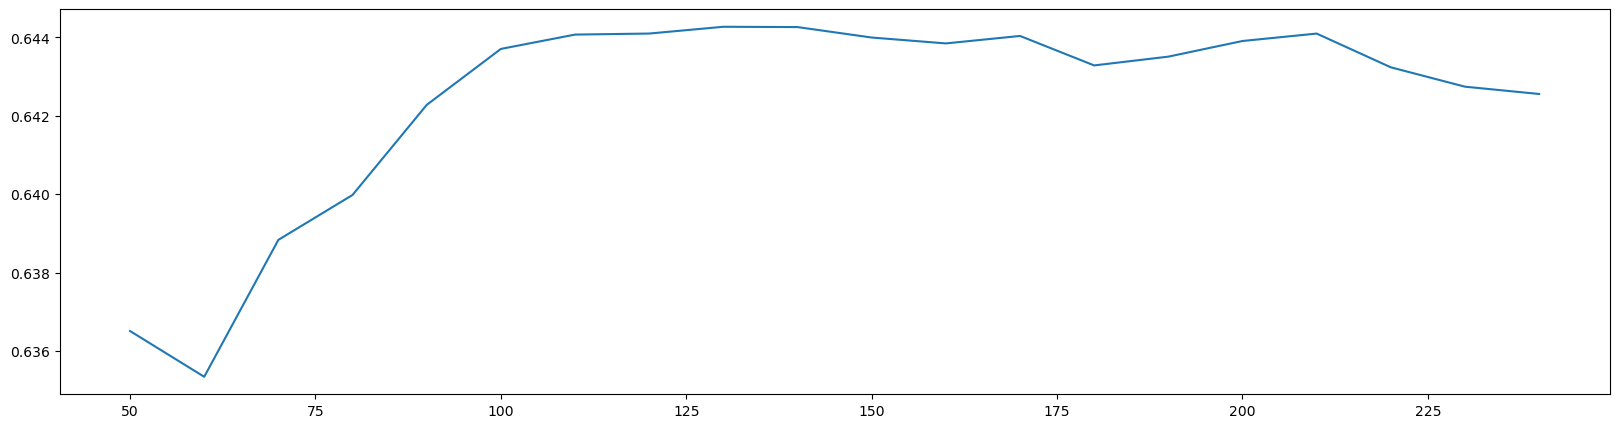

In [32]:
plt.figure(figsize=[20,5])
plt.plot(range(50,250,10),cv_score_list)
plt.show()

In [33]:
cv_score_list=[]
for i in range(121,140):
    rf = RandomForestRegressor(n_estimators=i,
                               n_jobs=-1, random_state=28)
    cv_score = cross_val_score(rf, X_train_8vi, y_train,
                               scoring='r2',
                               cv=3,
                               n_jobs=-1).mean()
    cv_score_list.append(cv_score)
print(max(cv_score_list),([*range(121,140)][cv_score_list.index(max(cv_score_list))]))

0.6445727360906403 135


In [26]:
# max_depth
cv_score_list=[]
for i in range(1,11):
    rf = RandomForestRegressor(n_estimators=135,
                               max_depth=i,
                               n_jobs=-1, random_state=28)
    cv_score = cross_val_score(rf, X_train_8vi, y_train,
                               scoring='r2',
                               cv=3,
                               n_jobs=-1).mean()
    cv_score_list.append(cv_score)
print(max(cv_score_list),([*range(1,11)][cv_score_list.index(max(cv_score_list))]))

0.6513266557247689 1


In [28]:
# max_features
cv_score_list=[]
for i in range(1,11):
    rf = RandomForestRegressor(n_estimators=135,
                               max_depth=1,
                               max_features=i,
                               n_jobs=-1, random_state=28)
    cv_score = cross_val_score(rf, X_train_8vi, y_train,
                               scoring='r2',
                               cv=3,
                               n_jobs=-1).mean()
    cv_score_list.append(cv_score)
print(max(cv_score_list),([*range(1,11)][cv_score_list.index(max(cv_score_list))]))

0.6591879276994047 8


In [29]:
# min_samples_split
cv_score_list=[]
for i in range(2,12):
    rf = RandomForestRegressor(n_estimators=135,
                               max_depth=1,
                               max_features=8,
                               min_samples_split=i,
                               n_jobs=-1, random_state=28)
    cv_score = cross_val_score(rf, X_train_8vi, y_train,
                               scoring='r2',
                               cv=3,
                               n_jobs=-1).mean()
    cv_score_list.append(cv_score)
print(max(cv_score_list),([*range(2,12)][cv_score_list.index(max(cv_score_list))]))

0.6591879276994049 4


In [30]:
# min_samples_leaf
cv_score_list=[]
for i in range(1,11):
    rf = RandomForestRegressor(n_estimators=135,
                               max_depth=1,
                               max_features=8,
                               min_samples_split=4,
                               min_samples_leaf=i,
                               n_jobs=-1, random_state=28)
    cv_score = cross_val_score(rf, X_train_8vi, y_train,
                               scoring='r2',
                               cv=3,
                               n_jobs=-1).mean()
    cv_score_list.append(cv_score)
print(max(cv_score_list),([*range(1,11)][cv_score_list.index(max(cv_score_list))]))

0.659187927699405 6


#### 4 VIs + ACF + Permutation Entropy

In [25]:
cv_score_list = []
for i in range(50,250,10):
    rf = RandomForestRegressor(n_estimators=i,
                               n_jobs=-1, random_state=28)
    cv_score = cross_val_score(rf, X_train_4vi_acf_pe, y_train,
                               scoring='r2',
                               cv=3,
                               n_jobs=-1).mean()
    cv_score_list.append(cv_score)
print(max(cv_score_list),([*range(50,250,10)][cv_score_list.index(max(cv_score_list))]))

0.6420040514218558 160


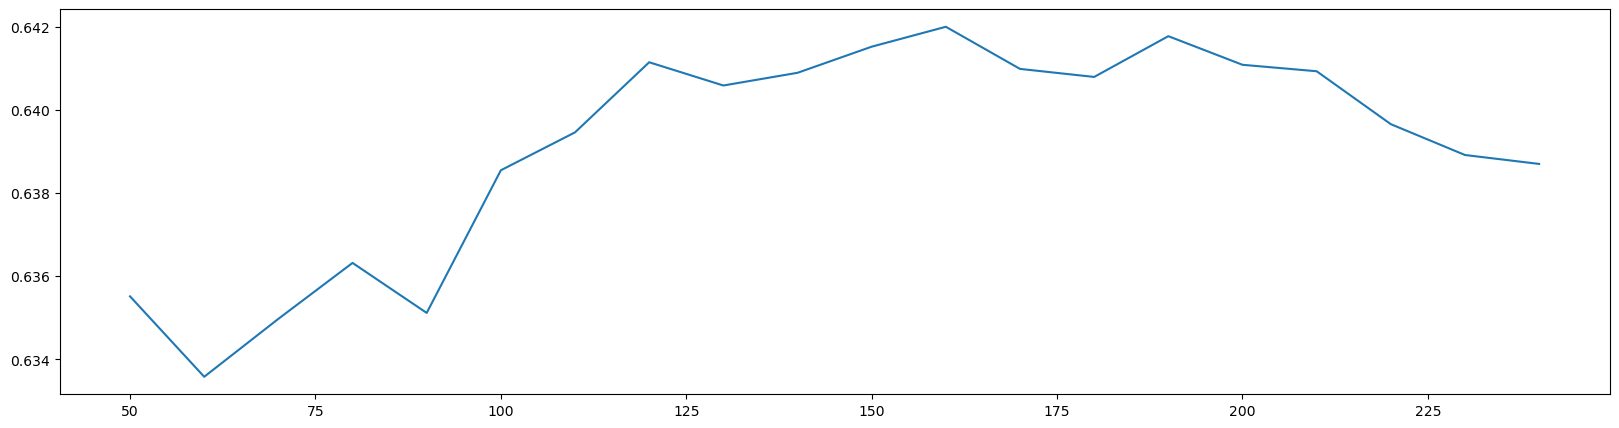

In [26]:
plt.figure(figsize=[20,5])
plt.plot(range(50,250,10),cv_score_list)
plt.show()

In [27]:
cv_score_list=[]
for i in range(151,170):
    rf = RandomForestRegressor(n_estimators=i,
                               n_jobs=-1, random_state=28)
    cv_score = cross_val_score(rf, X_train_4vi_acf_pe, y_train,
                               scoring='r2',
                               cv=3,
                               n_jobs=-1).mean()
    cv_score_list.append(cv_score)

0.642656829536625 127


In [28]:
print(max(cv_score_list),([*range(151,170)][cv_score_list.index(max(cv_score_list))]))

0.642656829536625 157


In [29]:
# 4 VIs + ACF + Permutation Entropy：max_depth
cv_score_list=[]
for i in range(1,11):
    rf = RandomForestRegressor(n_estimators=157,
                               max_depth=i,
                               n_jobs=-1, random_state=28)
    cv_score = cross_val_score(rf, X_train_4vi_acf_pe, y_train,
                               scoring='r2',
                               cv=3,
                               n_jobs=-1).mean()
    cv_score_list.append(cv_score)
print(max(cv_score_list),([*range(1,11)][cv_score_list.index(max(cv_score_list))]))

0.6510724847461192 3


In [30]:
# 4 VIs + ACF + Permutation Entropy：max_features
cv_score_list=[]
for i in range(1,11):
    rf = RandomForestRegressor(n_estimators=157,
                               max_depth=3,
                               max_features=i,
                               n_jobs=-1, random_state=28)
    cv_score = cross_val_score(rf, X_train_4vi_acf_pe, y_train,
                               scoring='r2',
                               cv=3,
                               n_jobs=-1).mean()
    cv_score_list.append(cv_score)
print(max(cv_score_list),([*range(1,11)][cv_score_list.index(max(cv_score_list))]))

0.6572388994566841 3


In [31]:
# 4 VIs + ACF + Permutation Entropy：min_samples_split
cv_score_list=[]
for i in range(2,12):
    rf = RandomForestRegressor(n_estimators=157,
                               max_depth=3,
                               max_features=3,
                               min_samples_split=i,
                               n_jobs=-1, random_state=28)
    cv_score = cross_val_score(rf, X_train_4vi_acf_pe, y_train,
                               scoring='r2',
                               cv=3,
                               n_jobs=-1).mean()
    cv_score_list.append(cv_score)
print(max(cv_score_list),([*range(2,12)][cv_score_list.index(max(cv_score_list))]))

0.6580971450235007 6


In [33]:
# 4 VIs + ACF + Permutation Entropy：min_samples_leaf
cv_score_list=[]
for i in range(1,11):
    rf = RandomForestRegressor(n_estimators=157,
                               max_depth=3,
                               max_features=3,
                               min_samples_split=6,
                               min_samples_leaf=i,
                               n_jobs=-1, random_state=28)
    cv_score = cross_val_score(rf, X_train_4vi_acf_pe, y_train,
                               scoring='r2',
                               cv=3,
                               n_jobs=-1).mean()
    cv_score_list.append(cv_score)
print(max(cv_score_list),([*range(1,11)][cv_score_list.index(max(cv_score_list))]))

0.6580971450235008 1


# Output the predictions

In [52]:
sub_weather = np.load('submission_weather_staged.npy')
sub_vi = np.load('submission_vi_filtered.npz')
sub_freq = np.load('submission_vi_freq.npy')

In [53]:
sub_weather_2D = np.reshape(sub_weather,(100,sub_weather.shape[1]*sub_weather.shape[2]))
sub_weather_2D.shape

(100, 180)

In [54]:
sub_vi_data = sub_vi['arr_0']
sub_vi_2D = np.reshape(sub_vi_data,(100,sub_vi_data.shape[1]*sub_vi_data.shape[2]*sub_vi_data.shape[3]))
sub_vi_2D.shape

(100, 80)

In [55]:
index_sub = pd.read_csv('Challenge_2_submission_template.csv')
index_sub

,ID No,District,Latitude,Longitude,"Season(SA = Summer Autumn, WS = Winter Spring)","Rice Crop Intensity(D=Double, T=Triple)",Date of Harvest,Field size (ha),Predicted Rice Yield (kg/ha)
0,1,Chau_Phu,10.542192,105.187920,WS,T,10-04-2022,1.40,NaN
1,2,Chau_Thanh,10.400189,105.331053,SA,T,15-07-2022,1.32,NaN
2,3,Chau_Phu,10.505489,105.203926,SA,D,14-07-2022,1.40,NaN
3,4,Chau_Phu,10.523520,105.138274,WS,D,10-04-2022,1.80,NaN
4,5,Thoai_Son,10.294660,105.248528,SA,T,20-07-2022,2.20,NaN
...,...,...,...,...,...,...,...,...,...
95,96,Chau_Thanh,10.435839,105.132981,SA,D,26-07-2022,1.21,NaN
96,97,Chau_Phu,10.529357,105.147388,WS,T,10-04-2022,2.00,NaN
97,98,Chau_Thanh,10.452537,105.205118,SA,T,20-07-2022,5.50,NaN
98,99,Chau_Thanh,10.394341,105.126836,SA,T,14-07-2022,4.40,NaN


In [56]:
sub_n_cycle = pd.get_dummies(index_sub['Rice Crop Intensity(D=Double, T=Triple)'])  #生成D、T两列
sub_n_cycle = np.reshape(np.array(sub_n_cycle['D']),(-1,1))   #以D=1，T=1，(-1,1)指转化为一列
sub_field_size = np.reshape(np.array(index_sub['Field size (ha)']),(-1,1))

In [58]:
X_test = np.concatenate((sub_weather_2D,sub_vi_2D,sub_freq,sub_n_cycle,sub_field_size),axis=1)
X_test.shape

(100, 266)

In [59]:
y_pred = rf_best.predict(X_test)

In [191]:
model_lgb_best.fit(X_train, y_train)
y_pred_lgb = model_lgb_best.predict(X_test)

In [192]:
rf_best.fit(X_train, y_train)
y_pred_rf = rf_best.predict(X_test)

In [201]:
rf_best.fit(X_filtered, y_filtered)
y_pred_rf2 = rf_best.predict(X_test_filtered)

In [194]:
y_pred_lgb_rf = 0.15*y_pred_lgb + 0.85*y_pred_rf

In [60]:
df1 = index_sub.drop(columns=['Predicted Rice Yield (kg/ha)'])
df2 = pd.DataFrame(y_pred)
df2.columns=['Predicted Rice Yield (kg/ha)']
submission = pd.concat([df1,df2],axis=1)
submission

,ID No,District,Latitude,Longitude,"Season(SA = Summer Autumn, WS = Winter Spring)","Rice Crop Intensity(D=Double, T=Triple)",Date of Harvest,Field size (ha),Predicted Rice Yield (kg/ha)
0,1,Chau_Phu,10.542192,105.187920,WS,T,10-04-2022,1.40,7229.738958
1,2,Chau_Thanh,10.400189,105.331053,SA,T,15-07-2022,1.32,5929.969196
2,3,Chau_Phu,10.505489,105.203926,SA,D,14-07-2022,1.40,5935.138103
3,4,Chau_Phu,10.523520,105.138274,WS,D,10-04-2022,1.80,7229.738958
4,5,Thoai_Son,10.294660,105.248528,SA,T,20-07-2022,2.20,5946.181519
...,...,...,...,...,...,...,...,...,...
95,96,Chau_Thanh,10.435839,105.132981,SA,D,26-07-2022,1.21,5929.969196
96,97,Chau_Phu,10.529357,105.147388,WS,T,10-04-2022,2.00,7229.738958
97,98,Chau_Thanh,10.452537,105.205118,SA,T,20-07-2022,5.50,5935.978774
98,99,Chau_Thanh,10.394341,105.126836,SA,T,14-07-2022,4.40,5935.138103


In [61]:
submission.to_csv('submission_rf3.csv')